In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
# Load Dataset
df = pd.read_csv("superstore.csv")

# Data Summary

In [7]:
print("Top 5 cols of the dataset:", df.head())

Top 5 cols of the dataset:           Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   

    Segment      

In [9]:
print("Bottom 5 cols of the dataset:", df.tail())

Bottom 5 cols of the dataset:               Category         City        Country Customer.ID  \
51285  Office Supplies  Los Angeles  United States   AM-103604   
51286  Office Supplies  Los Angeles  United States   AM-103604   
51287  Office Supplies  Los Angeles  United States   HR-147704   
51288  Office Supplies  Los Angeles  United States   RM-196754   
51289  Office Supplies  Los Angeles  United States   FH-143654   

        Customer.Name  Discount Market  记录数               Order.Date  \
51285  Alice McCarthy       0.2     US    1  2014-12-03 00:00:00.000   
51286  Alice McCarthy       0.2     US    1  2014-12-03 00:00:00.000   
51287  Hallie Redmond       0.2     US    1  2014-12-18 00:00:00.000   
51288   Robert Marley       0.2     US    1  2014-12-25 00:00:00.000   
51289    Fred Hopkins       0.2     US    1  2014-12-26 00:00:00.000   

             Order.ID  ... Sales      Segment                Ship.Date  \
51285  CA-2014-109701  ...    69    Corporate  2014-12-04 00:00:00

In [11]:
# Dataset overview

print("Shape of the dataset:", df.shape)

print("\nColumns in the dataset:\n", df.columns)

Shape of the dataset: (51290, 27)

Columns in the dataset:
 Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


In [13]:
# Check for missing values

print("\nMissing values in each column:\n", df.isnull().sum())

print("\nPercentage of missing values in each column:\n", (df.isnull().sum()/len(df))*100)


Missing values in each column:
 Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

Percentage of missing values in each column:
 Category          0.0
City              0.0
Country           0.0
Customer.ID       0.0
Customer.Name     0.0
Discount          0.0
Market            0.0
记录数               0.0
Order.Date        0.0
Order.ID          0.0
Order.Priority    0.0
Product.ID        0.0
Product.Name      0.0
Profit            0.0
Quantity          0.0
Region            0.0
Row.ID         

In [15]:
# Data types and summary statistics

print("\nData types:\n", df.dtypes)

print("\nSummary Statistics:\n", df.describe(include='all'))


Data types:
 Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

Summary Statistics:
                Category           City        Country Customer.ID  \
count             51290          51290          51290       51290   
unique                3           3636            147        4873   
top     Office Supplies  New York City  U

# Step 1: Data Cleaning

In [18]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])
df.rename(columns={"记录数": "Record.Count"}, inplace=True)

In [20]:
# Create Month Column

df['Order.Month'] = df['Order.Date'].dt.to_period("M").astype(str)

# Step 2: KPI Summary

In [22]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_discount = df['Discount'].mean()
top_product = df.groupby("Product.Name")["Sales"].sum().idxmax()

print("📊 KPI Summary")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Discount: {avg_discount:.2%}")
print(f"Top-Selling Product: {top_product}")

📊 KPI Summary
Total Sales: $12,642,905.00
Total Profit: $1,467,457.29
Average Discount: 14.29%
Top-Selling Product: Apple Smart Phone, Full Size


# Step 3: Visualization

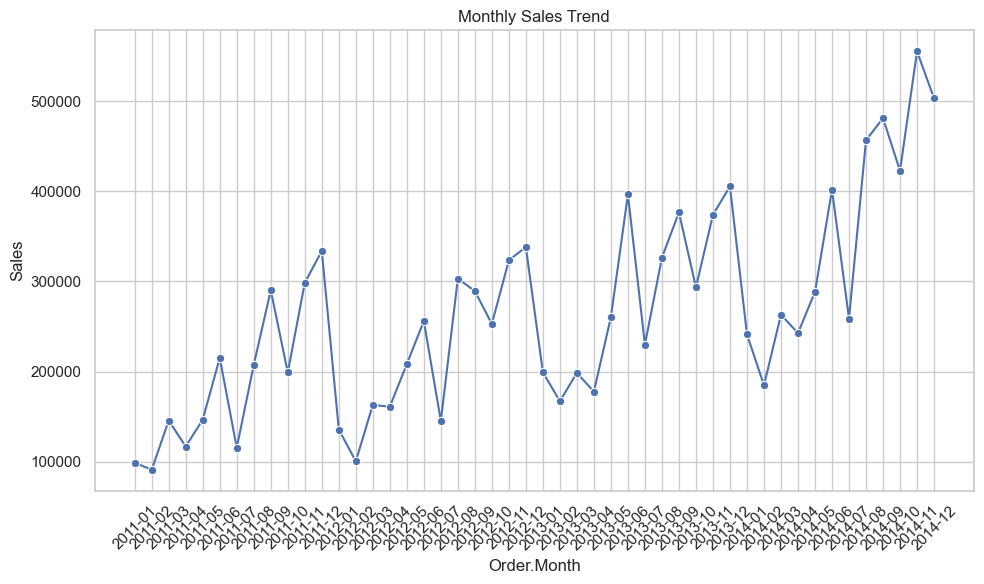

In [24]:
# 1. Monthly Sales Trend
monthly_sales = df.groupby('Order.Month')['Sales'].sum().reset_index()
plt.figure()
sns.lineplot(data=monthly_sales, x='Order.Month', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.savefig("1_monthly_sales_matplotlib.png")

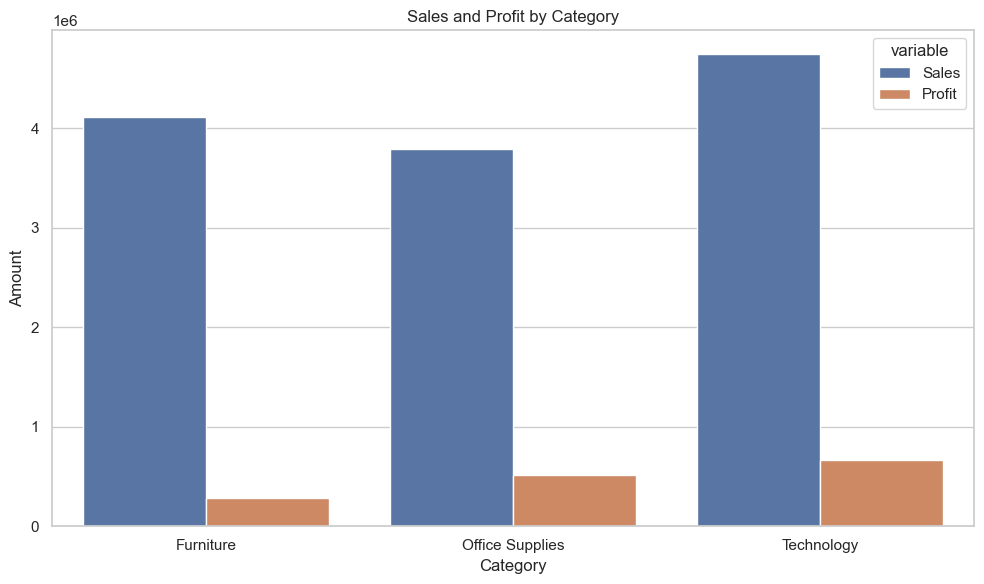

In [26]:
# 2. Sales & Profit by Category
cat_summary = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
plt.figure()
sns.barplot(data=cat_summary.melt(id_vars='Category'), x='Category', y='value', hue='variable')
plt.ylabel("Amount")
plt.title("Sales and Profit by Category")
plt.tight_layout()
plt.savefig("2_category_sales_profit_matplotlib.png")

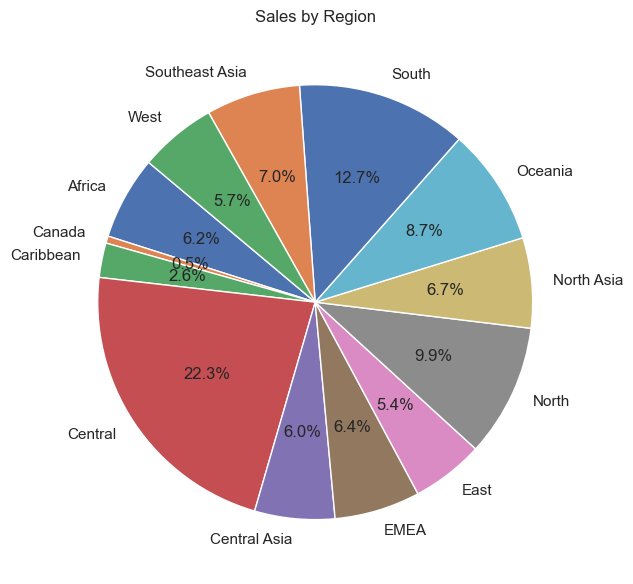

In [28]:
# 3. Sales by Region (Pie Chart)
region_sales = df.groupby('Region')['Sales'].sum()
plt.figure()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales by Region")
plt.tight_layout()
plt.savefig("3_sales_by_region_pie_matplotlib.png")

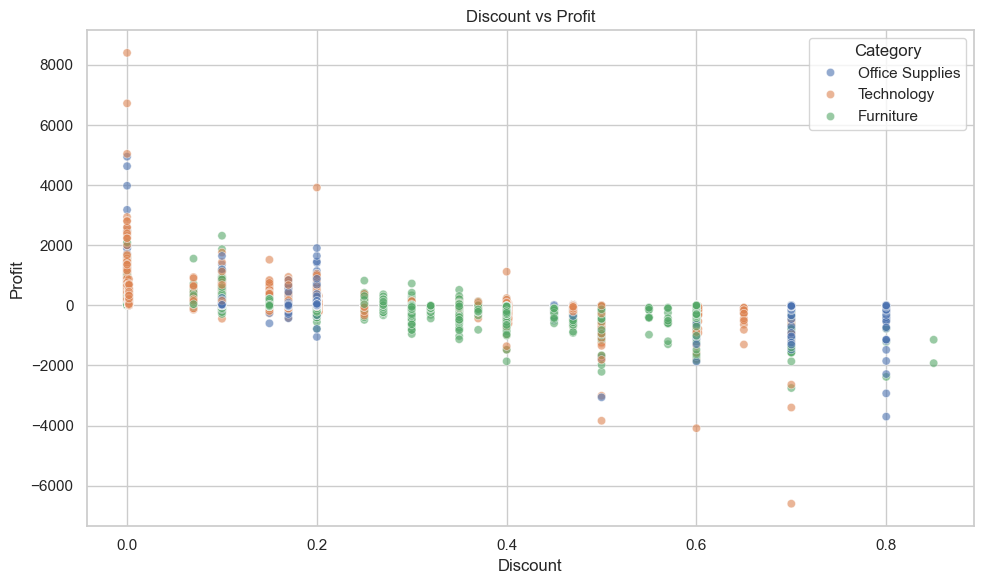

In [30]:
# 4. Discount vs Profit (Scatter Plot)
plt.figure()
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.6)
plt.title("Discount vs Profit")
plt.tight_layout()
plt.savefig("4_discount_vs_profit_scatter.png")

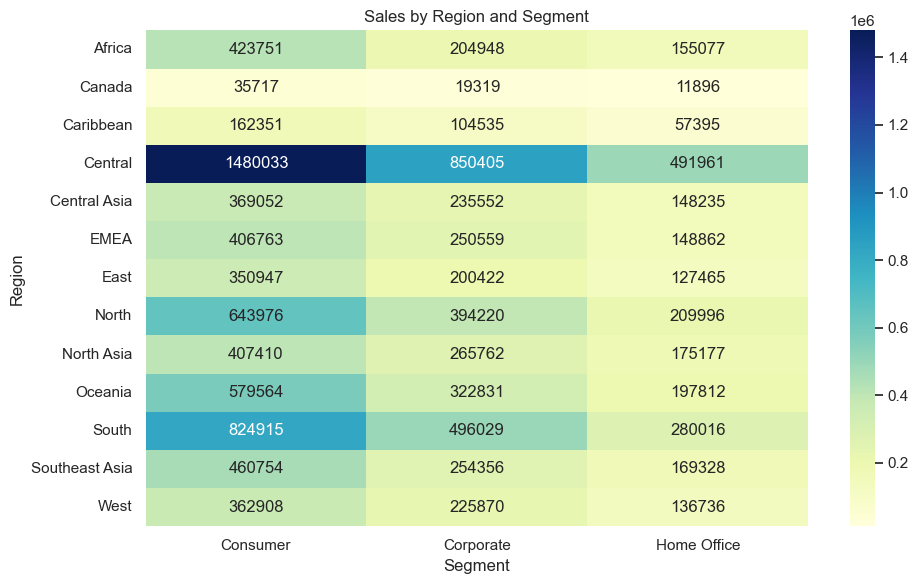

In [32]:
# 5. Heatmap – Sales by Region & Segment
heat_data = df.groupby(['Region', 'Segment'])['Sales'].sum().unstack().fillna(0)
plt.figure()
sns.heatmap(heat_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales by Region and Segment")
plt.tight_layout()
plt.savefig("5_heatmap_region_segment.png")

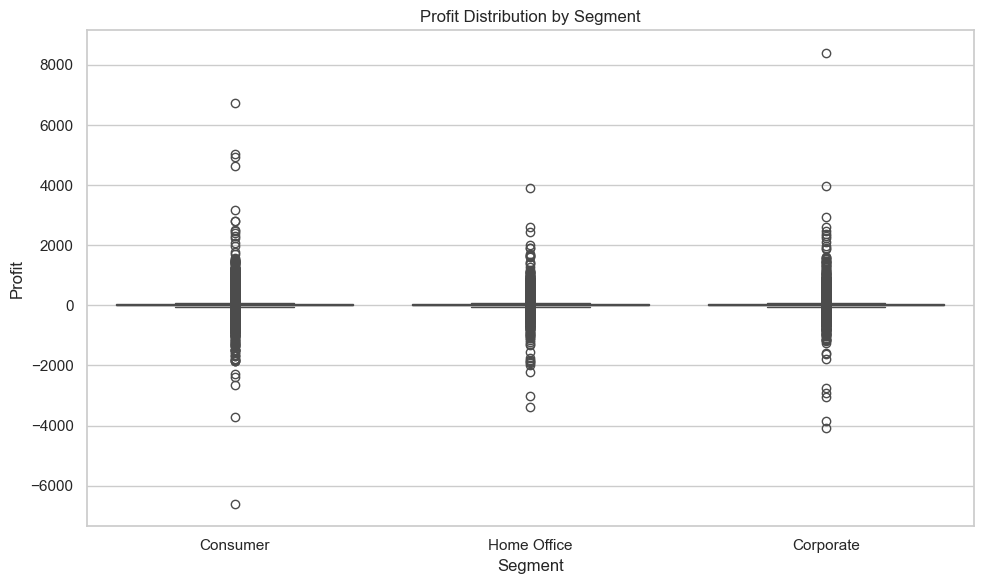

In [34]:
# 6. Profit Distribution by Segment (Box Plot)
plt.figure()
sns.boxplot(data=df, x='Segment', y='Profit')
plt.title("Profit Distribution by Segment")
plt.tight_layout()
plt.savefig("6_profit_boxplot_segment.png")

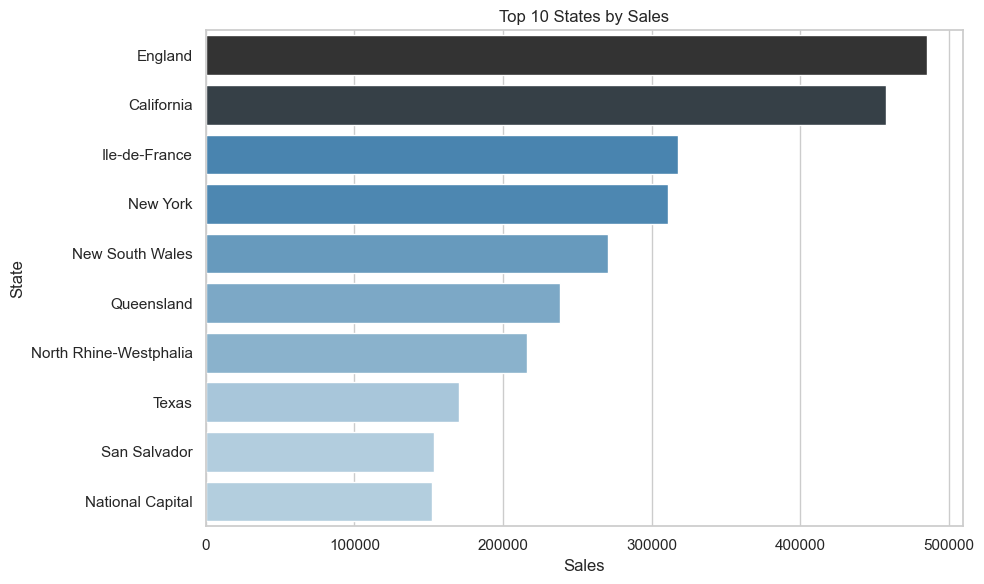

In [50]:
# 7. Top 10 States by Sales
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure()
sns.barplot(data=top_states, x='Sales', y='State', palette='Blues_d', hue='Sales', legend=False)
plt.title("Top 10 States by Sales")
plt.tight_layout()
plt.savefig("7_top_states_sales.png")

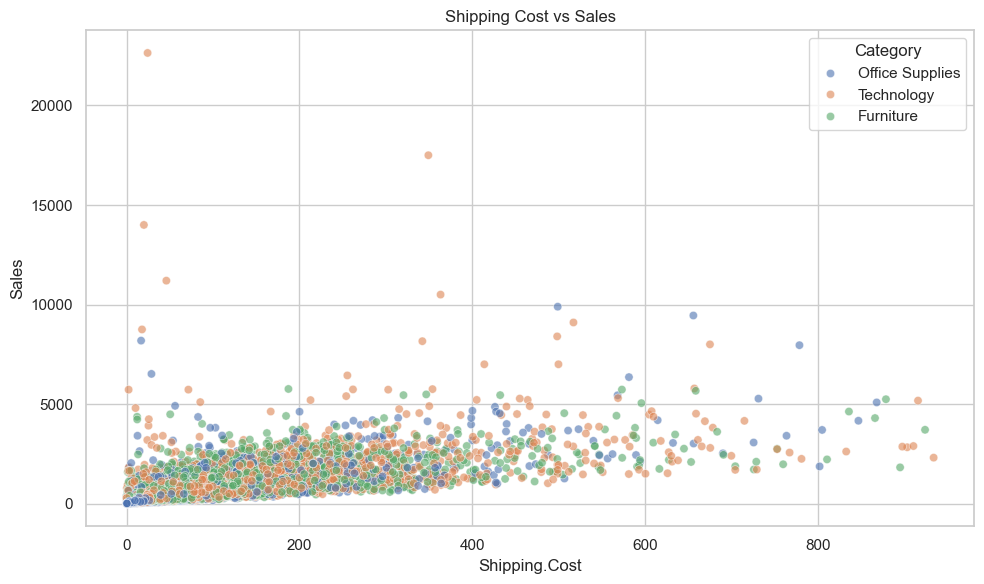

In [38]:
# 8. Shipping Cost vs Sales
plt.figure()
sns.scatterplot(data=df, x='Shipping.Cost', y='Sales', hue='Category', alpha=0.6)
plt.title("Shipping Cost vs Sales")
plt.tight_layout()
plt.savefig("8_shipping_cost_vs_sales.png")

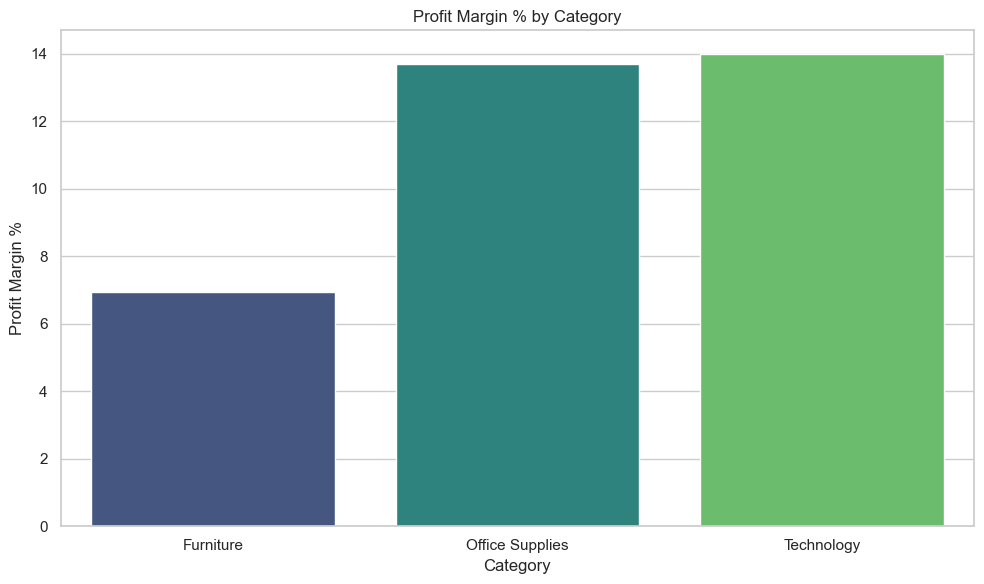

In [48]:
# 9. Profit Margin % by Category
cat_margin = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
cat_margin['Profit Margin %'] = (cat_margin['Profit'] / cat_margin['Sales']) * 100
plt.figure()
sns.barplot(data=cat_margin, x='Category', y='Profit Margin %', hue='Category', palette='viridis', legend=False)
plt.title("Profit Margin % by Category")
plt.tight_layout()
plt.savefig("9_profit_margin_by_category.png")

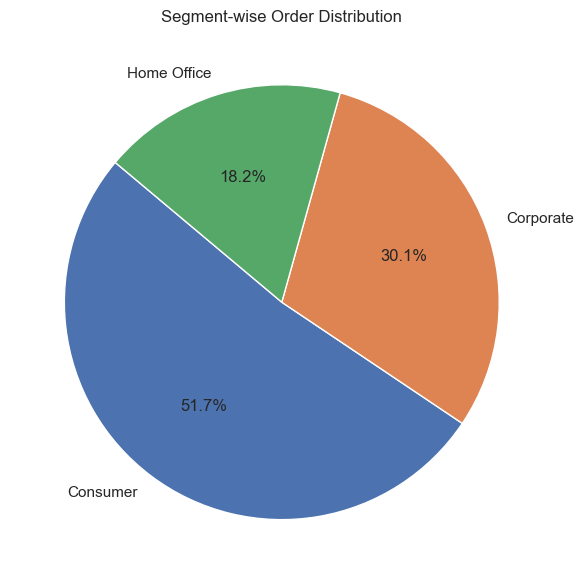

In [42]:
# 10. Segment-wise Order Distribution
segment_count = df['Segment'].value_counts().reset_index()
segment_count.columns = ['Segment', 'Total Orders']
plt.figure()
plt.pie(segment_count['Total Orders'], labels=segment_count['Segment'], autopct='%1.1f%%', startangle=140)
plt.title("Segment-wise Order Distribution")
plt.tight_layout()
plt.savefig("10_segment_order_distribution.png")